```
Student-1
Name: FARDIN ABU UBAID
ID# : 21-44863-2
```

```
Student-2
Name: MUHTASIB IBTIDA KOUSIK
ID# : 21-44864-2
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [2]:
# load/import all required library

# start writing your code here

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

# start writing your code here

data = pd.read_csv('/content/drive/My Drive/Final Project/bank.csv')

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
# write task-2 solution

# start writing your code here

initial_count = data.shape[0]
data = data.drop_duplicates()
final_count = data.shape[0]
print(f"Removed {initial_count - final_count} duplicates; {final_count} records remain.")

data['job'] = data['job'].map({'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11, 'unknown': 12})
data['marital'] = data['marital'].map({'divorced': 1, 'married': 2, 'single': 3})
data['education'] = data['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4})
data['default'] = data['default'].map({'no': 0, 'yes': 1})
data['housing'] = data['housing'].map({'no': 0, 'yes': 1})
data['loan'] = data['loan'].map({'no': 0, 'yes': 1})
data['contact'] = data['contact'].map({'cellular': 1, 'telephone': 2, 'unknown': 3})
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['poutcome'] = data['poutcome'].map({'failure': 1, 'success': 2, 'other': 3, 'unknown': 4})
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

Removed 0 duplicates; 11162 records remain.


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

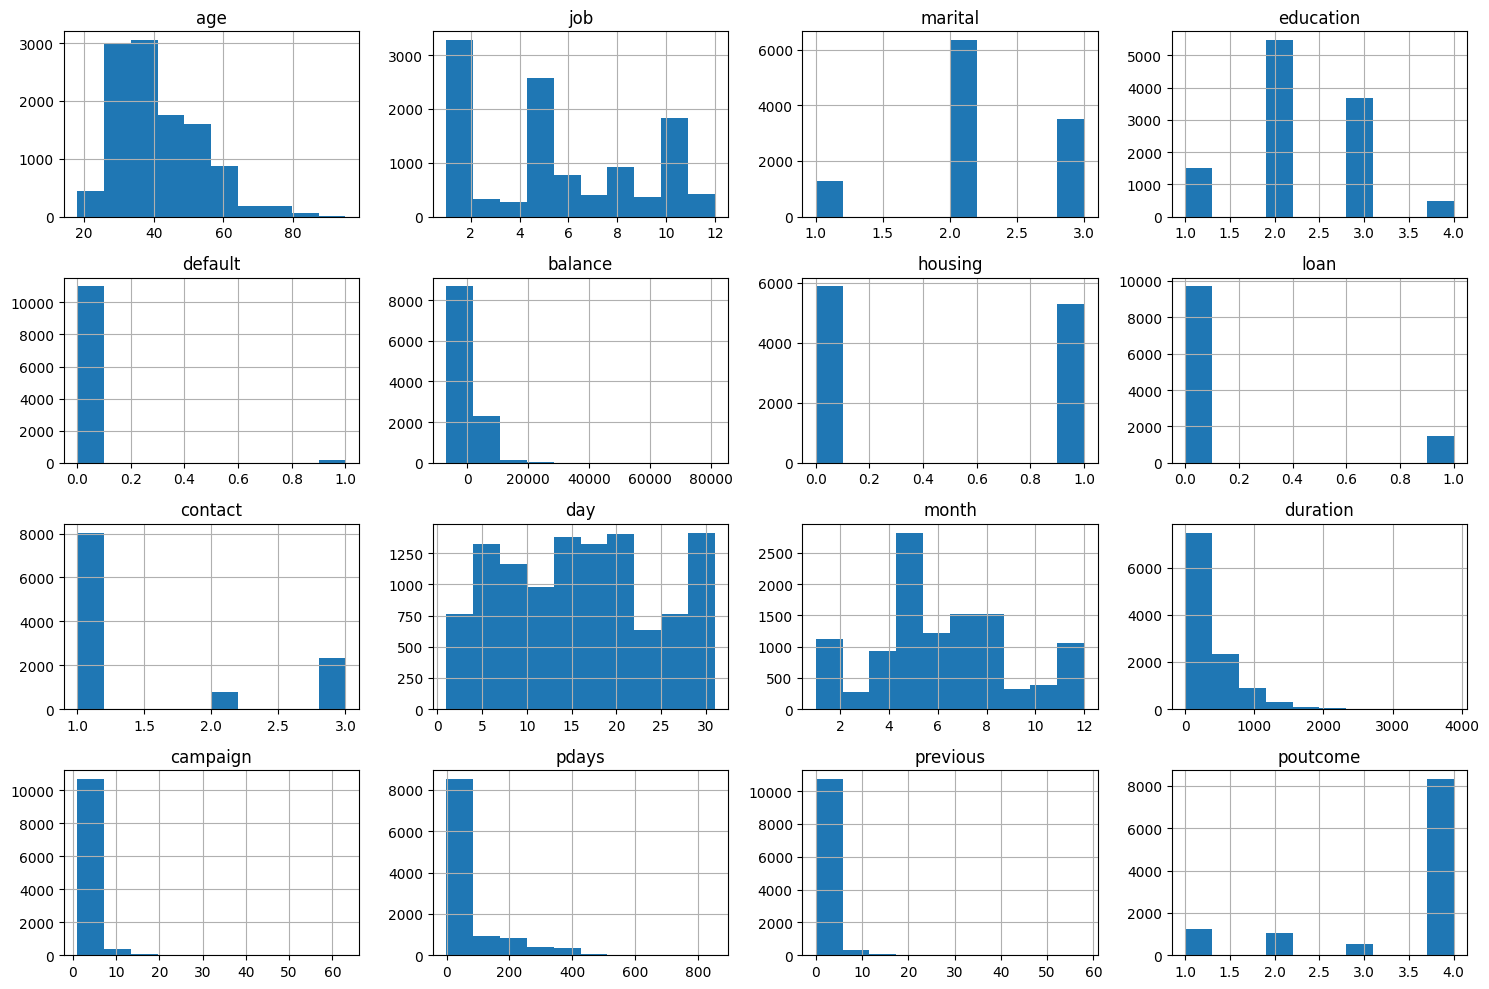

In [5]:
# write task-3 solution

# start writing your code here

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    if column != 'deposit':
        plt.subplot(4, 4, i)
        if data[column].dtype == 'object':
            data[column].value_counts().plot(kind='bar')
        else:
            data[column].hist()
        plt.title(column)
plt.tight_layout()
plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

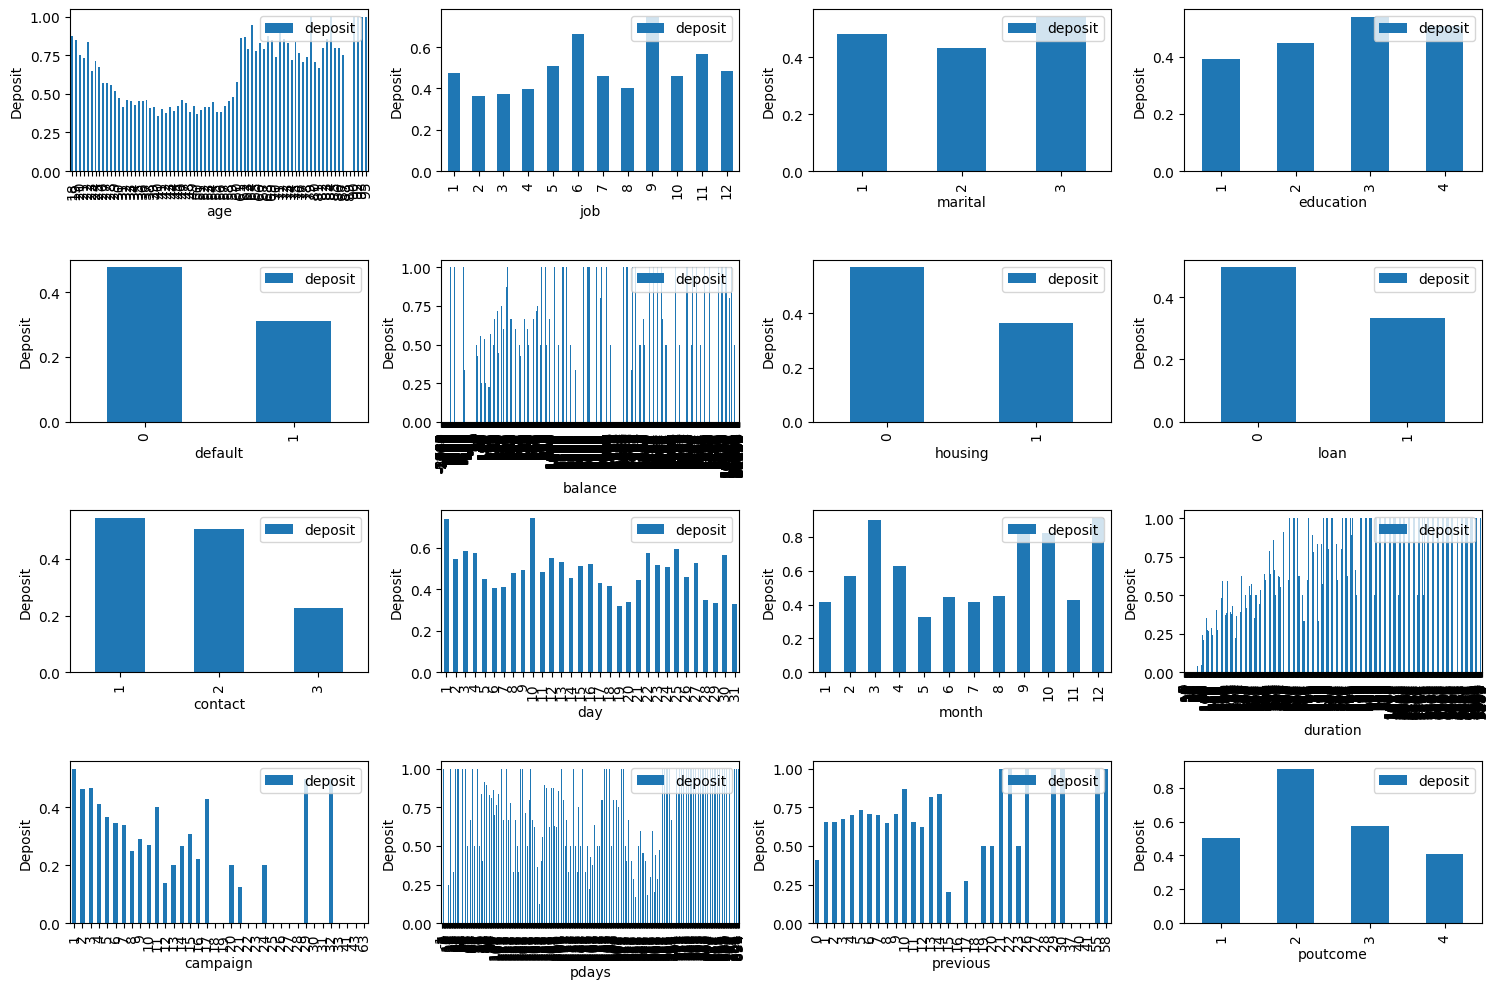

In [6]:
# write task-4 solution

# start writing your code here

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 0):
    if column != 'deposit':
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        if data[column].dtype == 'object':
            data.groupby([column, 'deposit']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
        else:
            data[[column, 'deposit']].groupby(column).mean().plot(kind='bar', legend=False, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Deposit')
        ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [7]:
# write task-5 solution

# start writing your code here

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('deposit', axis=1))

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [8]:
# write task-6 solution

# start writing your code here

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['deposit'], test_size=0.2, random_state=321)

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [9]:
# write task-7 solution

# start writing your code here

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

Confusion Matrix:
[[826 354]
 [210 843]]


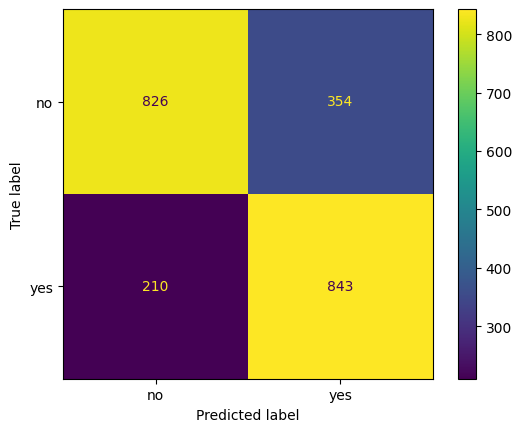

In [10]:
# write task-8 solution

# start writing your code here

y_pred = nb_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['no', 'yes'])
cm_display.plot()
plt.show()

•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [11]:
# write task-9 solution

# start writing your code here

train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7464441706798074
Test Accuracy: 0.7474249888042992


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [12]:
# write task-10 solution

# start writing your code here

cv_scores = cross_val_score(nb_classifier, scaled_features, data['deposit'], cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.51208594 0.71709937 0.67741935 0.74462366 0.73207885 0.8046595
 0.78853047 0.78494624 0.74641577 0.75      ]
Mean CV Accuracy: 0.7257859152941026
